In [19]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\karthik\Downloads\day.csv')


In [4]:

df = pd.get_dummies(df,columns=['season','weathersit'],drop_first=True)  


df.drop('dteday',axis=1,inplace=True)
df.drop('instant',axis=1,inplace=True)
df.drop('holiday',axis=1,inplace=True)

In [5]:
for i in df.columns:
    df[i].fillna(value = df[i].median())

In [6]:
df.columns

Index(['yr', 'mnth', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_2', 'season_3',
       'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')

(array([ 1.,  2.,  1.,  2.,  4., 10., 12.,  7., 15.,  6., 26., 21., 15.,
        24., 18., 15., 16., 24., 16., 15., 25.,  9., 18., 15., 18., 16.,
         8., 13., 14., 17., 12., 15., 18., 14., 13.,  6.,  9.,  4.,  1.,
         4.]),
 array([ 2.4243464 ,  3.23413392,  4.04392143,  4.85370895,  5.66349646,
         6.47328398,  7.28307149,  8.09285901,  8.90264652,  9.71243404,
        10.52222155, 11.33200907, 12.14179658, 12.9515841 , 13.76137161,
        14.57115913, 15.38094664, 16.19073416, 17.00052167, 17.81030919,
        18.6200967 , 19.42988422, 20.23967173, 21.04945925, 21.85924676,
        22.66903428, 23.47882179, 24.28860931, 25.09839682, 25.90818434,
        26.71797185, 27.52775937, 28.33754688, 29.1473344 , 29.95712191,
        30.76690943, 31.57669694, 32.38648446, 33.19627197, 34.00605949,
        34.815847  ]),
 <a list of 40 Patch objects>)

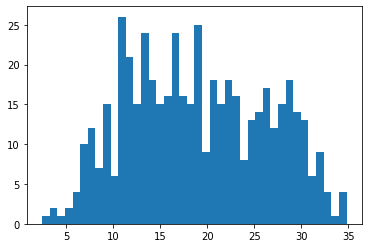

In [26]:
    plt.hist(df['temp'],40)

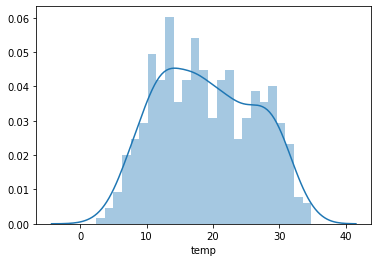

In [34]:
sns.distplot(df['temp'],bins=25)

(array([ 1.,  3.,  4., 10.,  8., 13., 13., 24., 31., 30., 28., 29., 25.,
        37., 26., 30., 35., 30., 19., 14., 14.,  8., 14., 11.,  6.,  5.,
        11.,  3.,  4.,  3.,  2.,  1.,  5.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.]),
 array([ 1.5002439 ,  2.31273833,  3.12523275,  3.93772718,  4.75022161,
         5.56271604,  6.37521047,  7.18770489,  8.00019932,  8.81269375,
         9.62518817, 10.4376826 , 11.25017703, 12.06267146, 12.87516589,
        13.68766031, 14.50015474, 15.31264917, 16.1251436 , 16.93763802,
        17.75013245, 18.56262688, 19.37512131, 20.18761573, 21.00011016,
        21.81260459, 22.62509902, 23.43759344, 24.25008787, 25.0625823 ,
        25.87507673, 26.68757115, 27.50006558, 28.31256001, 29.12505444,
        29.93754886, 30.75004329, 31.56253772, 32.37503215, 33.18752657,
        34.000021  ]),
 <a list of 40 Patch objects>)

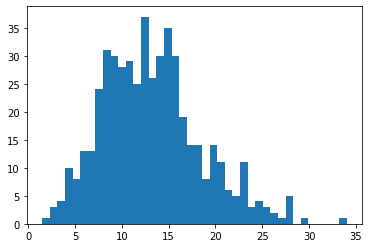

In [35]:
plt.hist(df['windspeed'],40)

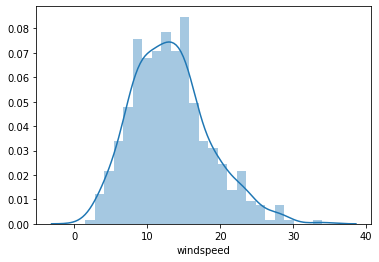

In [36]:
sns.distplot(df['windspeed'],bins=25)

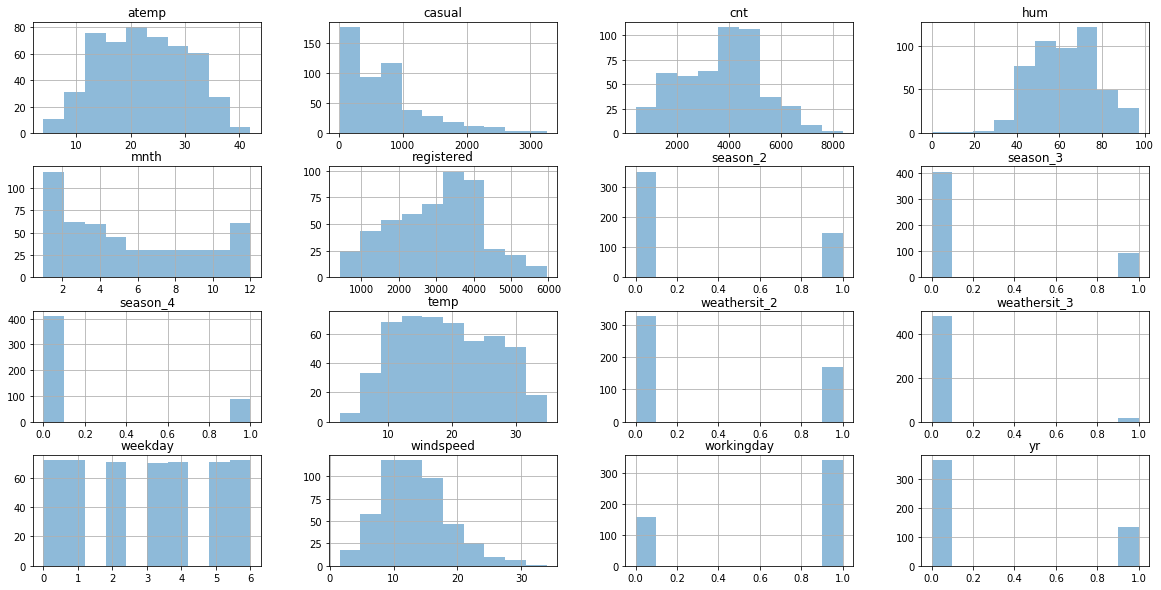

In [40]:
df.hist(bins=10,alpha=0.5, figsize=(20, 10))

plt.show()

In [42]:
df.corr()['cnt']

yr              0.355828
mnth            0.193226
weekday         0.043256
workingday      0.053859
temp            0.617873
atemp           0.629020
hum            -0.091001
windspeed      -0.184454
casual          0.697908
registered      0.930240
cnt             1.000000
season_2        0.345453
season_3        0.227954
season_4       -0.022028
weathersit_2   -0.150658
weathersit_3   -0.253174
Name: cnt, dtype: float64

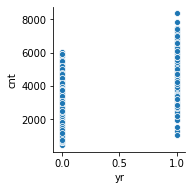

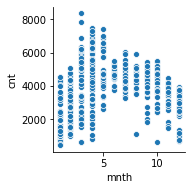

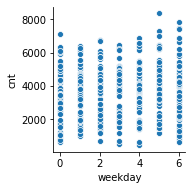

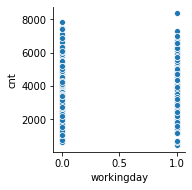

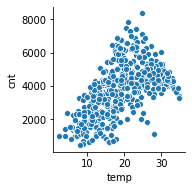

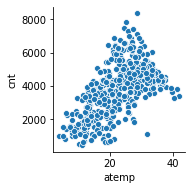

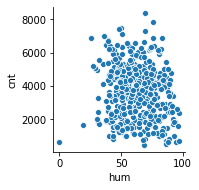

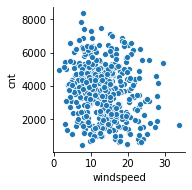

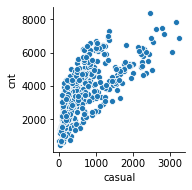

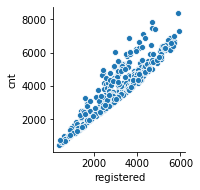

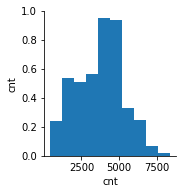

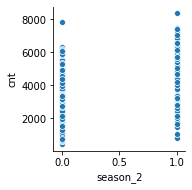

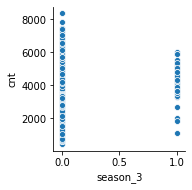

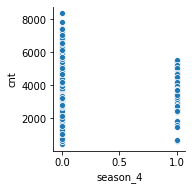

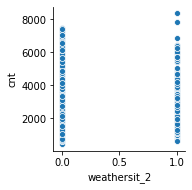

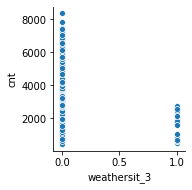

In [45]:
for i in range(0,len(df.columns)):
    sns.pairplot(df,y_vars=['cnt'],x_vars=df.columns[i])
    print(end=" ")

RMLSE for registered: 0.14238799060563823


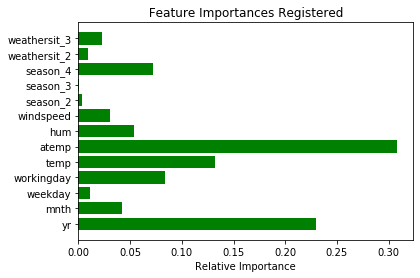

RMLSE for casual: 0.3035771611552824


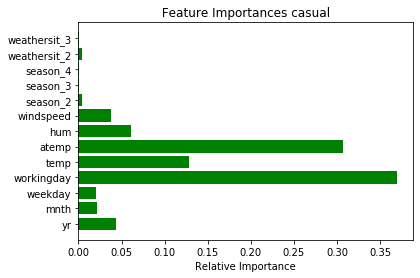

RMLSE for the whole data: 0.15102547005593392


In [5]:

# Model for registered
x = df.drop(['casual','registered','cnt'],axis = 1)
y = df.registered

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

from sklearn.ensemble import RandomForestRegressor



rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}
from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(x_train,y_train)

a = gs_rf.best_params_


RF = RandomForestRegressor(n_estimators=a['n_estimators'],max_depth=a['max_depth'],min_samples_leaf=a['min_samples_leaf'],random_state=0)

model_1 = RF.fit(x,y)
reg_pred = model_1.predict(x)
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(reg_pred,y)
rmsle=np.sqrt(msle)
print('RMLSE for registered:',rmsle) 
importances = RF.feature_importances_
plt.title(' Feature Importances Registered ')
plt.barh(range(len(importances)), importances, color='g', align='center')
plt.yticks(range(len(importances)), x.columns)
plt.xlabel('Relative Importance')
plt.show()


# Model for casual
x = df.drop(['casual','registered','cnt'],axis = 1)
y = df.casual

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

from sklearn.ensemble import RandomForestRegressor



rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}
from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(x_train,y_train)

a = gs_rf.best_params_


RF = RandomForestRegressor(n_estimators=a['n_estimators'],max_depth=a['max_depth'],min_samples_leaf=a['min_samples_leaf'],random_state=0)

model_1 = RF.fit(x,y)
casual_pred = model_1.predict(x)
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(casual_pred,y)
rmsle=np.sqrt(msle)
print('RMLSE for casual:',rmsle) 
importances = RF.feature_importances_
plt.title(' Feature Importances casual ')
plt.barh(range(len(importances)), importances, color='g', align='center')
plt.yticks(range(len(importances)), x.columns)
plt.xlabel('Relative Importance')
plt.show()

total_pred=reg_pred+casual_pred
pred=pd.DataFrame()
pred['pred']=total_pred
pred.sort_index(inplace = True)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(df['cnt'],total_pred)
rmsle=np.sqrt(msle)
print('RMLSE for the whole data:',rmsle)